<font size="5">name: **Yonatan Juarez**</font><br>
<font size="4">github: **yonatan-juarez-5**</font><br>
<font size="3">usc: **yjuarez**</font><br>

In [4]:
import numpy as np
import pandas as pd
from scipy.io import arff
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, DistanceMetric
from sklearn.preprocessing import LabelEncoder

<font size=6>***(a) Download the vertebral column data set <br>***

In [5]:
data_2c, meta = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data_2c)
print(df.head)
# class_mapping = {b"Abnormal":1, b"Normal":0}
# df["class"] = df["class"].map(class_mapping) #convert class labels to 0 and 1
class_0_data = df[df["class"] == b"Normal"]
class_1_data = df[df["class"] == b"Abnormal"]
# print(class_0_data.head)
# print(class_1_data.head)

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis        class  
0        

<font size=6>***(b)Pre-processing and exploratory data analysis:
<br><font size=5>i) Make scatterplots of the independent variables in the dataset<br>
Use color to show classes 0 and 1***

/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/sit

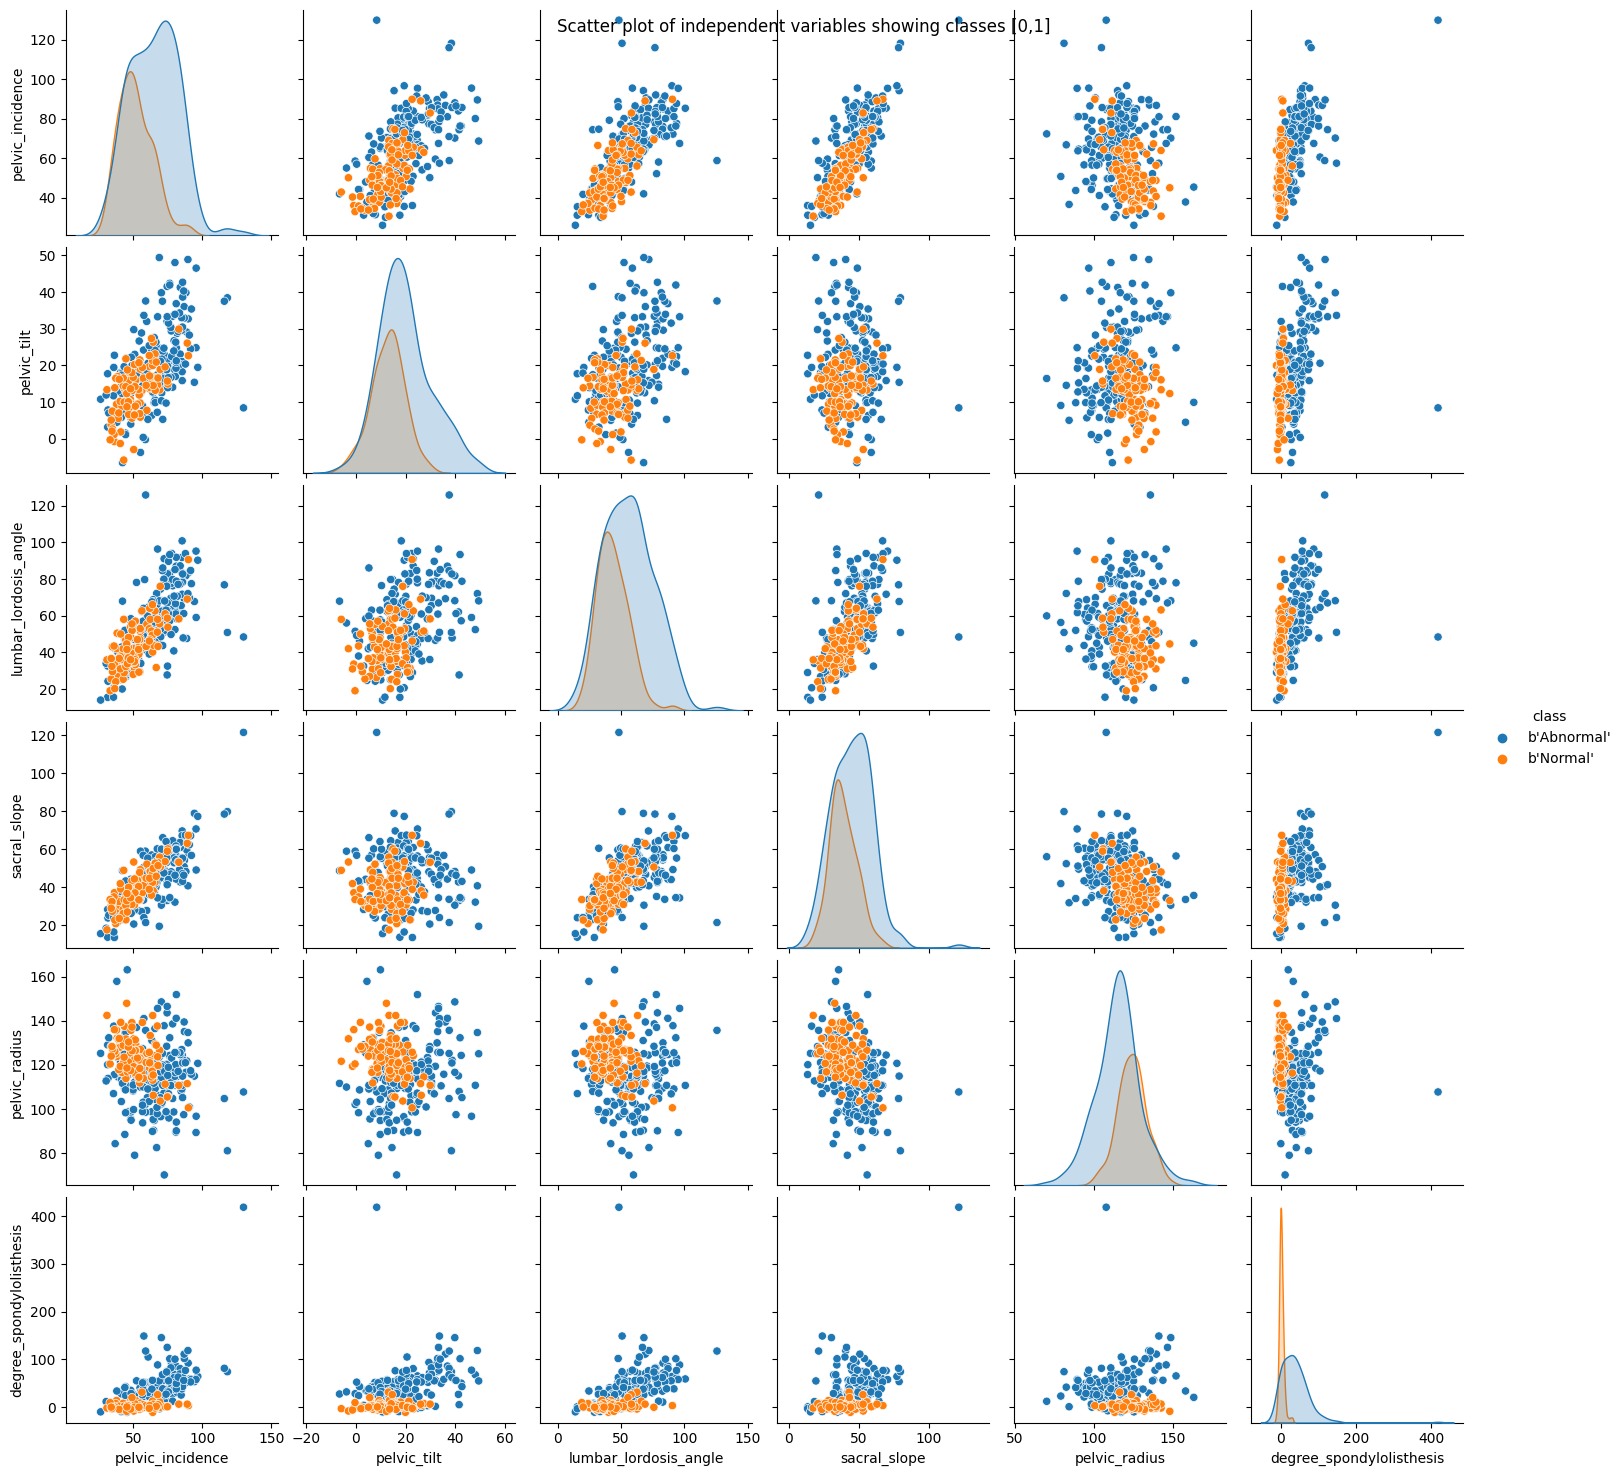

In [6]:
# sns.pairplot(data=df, diag_kind='kde')
sns.pairplot(df, hue="class")
plt.suptitle('Scatter plot of independent variables showing classes [0,1]')
plt.show()


<font size=5>***ii) Make boxplots for each of the independent variables. use color to show classes 0 and 1***

0: pelvic_incidence
1: pelvic_tilt
2: lumbar_lordosis_angle
3: sacral_slope
4: pelvic_radius
5: degree_spondylolisthesis


/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yonatanjuarez/test/HW1/homework-1-yonatan-juarez-5/.venv/lib/python3.11/sit

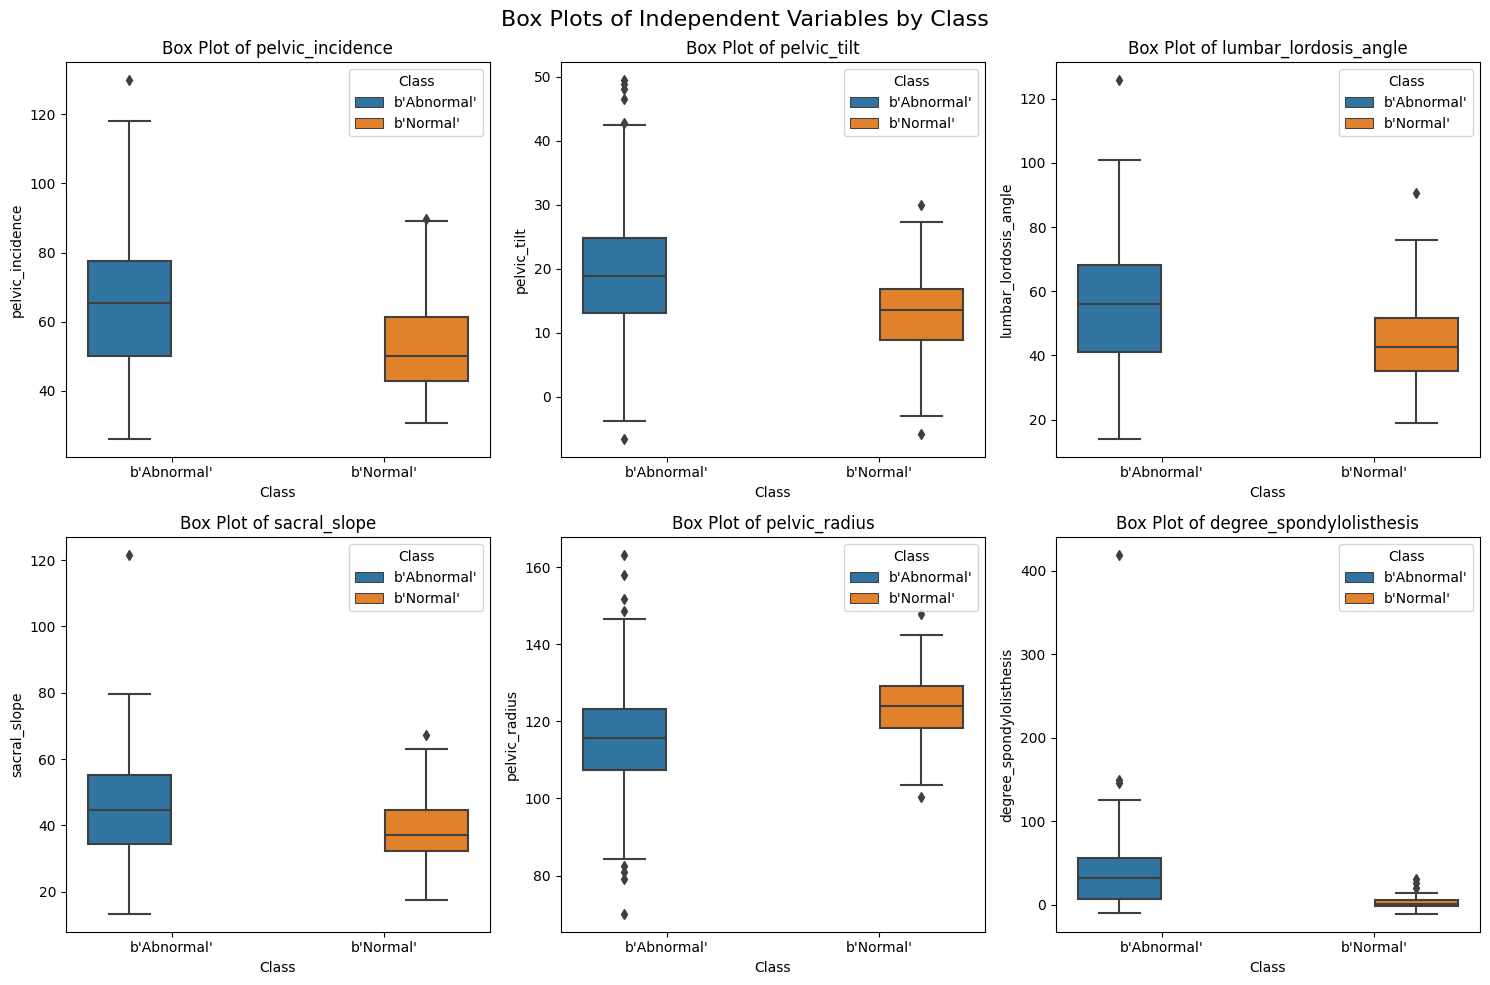

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Box Plots of Independent Variables by Class', fontsize=16)

for i, var in enumerate(df.columns[:-1]):
    print(f"{i}: {var}")
    row, col = i // 3, i % 3
    sns.boxplot(x='class', y=var, data=df, hue='class', ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}')
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(var)
    axes[row, col].legend(title='Class', loc='upper right')

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1,1])

# Show the plots
plt.show()

<font size=5>***iii) Select the first 70 rows of Class 0 and the first 140 rows of class 1 as the training set and the rest of the data as the test set***

In [8]:
# Select the first 70 rows of class 0 and first 140 rows of class 1 as the training set, and rest of the data as test set
train_class_0 = class_0_data.head(70) 
train_class_1 = class_1_data.head(140)

training_set = pd.concat([train_class_0, train_class_1])
test_set = df.drop(training_set.index)
# print(training_set)
# print(test_set)

<font size=6>***(c) Classification using KNN on vertebral column data set***

<font size=5>***i) write code for k-nearest neighbors with Euclidean metric (or use a software package)***

In [9]:
label_encoder = LabelEncoder()

X_train = training_set.drop('class', axis=1)  #features
y_train = training_set['class'] # target
y_train_encoded = label_encoder.fit_transform(y_train)
# print(y_train_encoded)
X_test = test_set.drop('class', axis=1)
# print(X_test)
y_test = test_set['class']
y_test_encoded = label_encoder.transform(y_test)
# print(y_test_encoded)

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k) #create KNN classifier
knn_classifier.fit(X_train, y_train_encoded) # Fit the classifier to your training data
y_pred = knn_classifier.predict(X_test) # Predict the class labels for the test data

accuracy = accuracy_score(y_test_encoded, y_pred) # Calculate the accuracy of the model
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.00%


<font size=5>***ii) Test all the data in the test database with k nearest neighbors<br>
Plot train and test errors in terms of k for k = 1,4,7, 205, 208***

In [10]:
train_errors = []
test_errors = []
confusion_matrices = []

y_train = y_train_encoded
y_test = y_test_encoded
k_values = [n for n in range(1,209,3)]
test_err = 1.0
best_k = 0
best_train_k = 0
best_test_error = float('inf')
best_train_error = float('inf')
best_ks = []
idx = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k) #create KNN classifier
    knn_classifier.fit(X_train, y_train)
    
    # Predict labels for train and test data
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Calculate the confusion matrix for the test set
    cm = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(cm)
    
    if (best_test_error >= test_error):
        best_k = k
        best_ks.append(best_k)
        best_test_error = test_error
        idx = idx+1
        
    if (best_train_error >= train_error) and k > 1:
        best_train_error = train_error
        best_train_k = k
        
    train_errors.append(train_error)
    test_errors.append(test_error)
    
print(f"Best k: {best_k}")
print(f"Best test error: {best_test_error:.4f}")
print(f"best k's = {best_ks}")
print(f"***Best train eror {best_train_error:.4f} at k={best_train_k}")
# print best test/train error


k_values = k_values[::-1]
# print(k_values)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, marker='o', label='Train Error')
plt.plot(k_values, test_errors, marker='o', label='Test Error')
plt.title('Train and Test Errors vs. K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()
plt.show()

AttributeError: 'Flags' object has no attribute 'c_contiguous'

<font size=5> ***Confusion matrix, TPR, TNR, precision, and F1-score when k=k****

In [ ]:
# calculate TPR & TNR
tpr_array = []
tnr_array = []
precisions = []
k1_scores = []

best_cm = None
best_tpr = None
best_tnr = None
best_precision = None

for cm in confusion_matrices:
    tp = cm[0, 0]  # True Positives
    fp = cm[0, 1]  # False Positives
    fn = cm[1, 0]  # False Negatives
    tn = cm[1, 1]  # True Negatives
    
    if tp+fn != 0:
        tpr = tp / (tp + fn)
    else:
        tpr = 0.0
    
    if tn + fp != 0:
        tnr = tn / (tn + fp)
    else:
        tnr = 0.0  # Set TNR to 0.0 when the denominator is zero
    
    tpr_array.append(tpr)
    tnr_array.append(tnr)
    
    # precision calculation
    if tp + fp != 0:
        precision = tp / (tp + fp)
    else:
        precision = 0.0  
    precisions.append(precision)
        
    # Calculate F1-score
    if precision + tpr != 0:
        k1_scores.append(2 * (precision * tpr) / (precision + tpr))
    else:
        k1_scores.append(0.0)
        
print(f"Confusion matrix: {confusion_matrices[idx]}")
print(f"True positve rate: {tpr_array[idx]}")
print(f"True negative rate: {tnr_array[idx]}")
print(f"Precision: {precisions[idx]}")
print(f"F1-score: {k1_scores[idx]}")

<font size=4>***49 is the most suitable k****

<font size=5>***iii) Plot the best test error rate against the size of the training set when N ={10,20,30,.., 210}<br>
For each N, select your trainig set to be the first N/3 of class 0 and the first N -N/3 of class 1 in the training set.<br>Starting at k=1, increase by 5 -> {1,6,11,..., 196}***

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_errors, marker='o', linestyle='-')
plt.title('Test Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Test Error Rate')
plt.grid()
plt.show()

print(f"Best k: {best_k}")
print(f"Best Test Error Rate: {best_test_error:.4f}")

In [ ]:
N = [n for n in range(10, 211, 10)]
best_k_values = []  # To store the best k values for each N
test_error_rates = []  # To store the test error rates for each N
train_error_rates = []

label_encoder = LabelEncoder()
combined_data = pd.concat([training_set, test_set])
combined_data["class"] = label_encoder.fit_transform(combined_data["class"])

# Split the combined dataset back into training and test sets
training_set = combined_data.iloc[:len(training_set)]
test_set = combined_data.iloc[len(training_set):]

for size in N:
    # Determine the number of rows for class 0 (N/3) and class 1 (N - N/3)
    num_class0 = size // 3
    num_class1 = size - num_class0
    
    best_k = None
    best_train_k = None
    best_test_error = float('inf')  # Initialize to a high value
    best_train_error = float('inf')

    # Assuming you have a DataFrame called 'data' containing the class labels
    class0_rows = training_set[training_set["class"] == 0].head(num_class0)
    #print(class0_rows)
    
    class1_rows = training_set[training_set["class"] == 1].head(num_class1)
    
    # Combine the selected rows for class 0 and class 1 to create the training set
    train_set = pd.concat([class0_rows, class1_rows])
    
    max_neighbors = min(len(train_set), size-1)
    k_array = [n for n in range(1,max_neighbors, 5)]
    
    for k in k_array:
        # Initialize and train a K-nearest neighbors classifier with the current K value
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        x_train = train_set.drop("class", axis=1)
        y_train = train_set["class"]
        knn_classifier.fit(x_train, y_train)

        # Make predictions on the test set
        x_test = test_set.drop("class", axis=1)
        test_predictions = knn_classifier.predict(x_test)
        y_test = test_set["class"]
        # Calculate the test error rate
        test_error = 1 - accuracy_score(y_test, test_predictions)
        
        # train prediction 
        train_predictions = knn_classifier.predict(x_train)
        # Calculate the train error rate
        train_error = 1 - accuracy_score(y_train, train_predictions)
        train_error_rates.append(train_error)
        
        if (train_error < best_train_error) and k > 1:
            best_train_error = train_error
            best_train_k = k

        # Check if the current K value gives a lower test error rate
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
            
    
    # Store the best K value for the current N
    best_k_values.append(best_k)
    test_error_rates.append(best_test_error)
    
for i, size in enumerate(N):
    print(f"N = {size}, Best K = {best_k_values[i]}, Best Test Error Rate = {test_error_rates[i]:.4f}")
    
print(f"***Best train error rate: {best_train_error} for k = {best_train_k}")

plt.figure(figsize=(10, 6))
plt.plot(N, test_error_rates, marker='o', linestyle='-')
plt.title('Best Test Error Rate vs. Size of Training Set')
plt.xlabel('Size of Training Set (N)')
plt.ylabel('Best Test Error Rate')
plt.grid(True)
plt.show()

<font size=6>***(d) Replace the Euclidean metric with the following metrics and test them.<br>Summarize
the test errors (when k = k*) in a table. Use all of your training data and select the best k when {1,6,11,..., 196}***

<font size=5>***i)Minkowski Distance:<br>
A. Which becomes Manhattan distance with p=1***

In [ ]:
# MANHATTAN
x_train = training_set.drop("class", axis=1)
y_train = training_set["class"]
# print(x_train)
# print(y_train)
x_test = test_set.drop("class", axis=1)
y_test = test_set["class"]
k_array = [n for n in range(1,200, 5)]

best_k = None
best_train_k = None
best_test_error = float('inf')
best_train_error = float('inf')

test_errors = []
train_errors = []

for k in k_array:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1, metric="manhattan")  # Manhattan distance
    knn_classifier.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(x_test)
    y_pred_train = knn_classifier.predict(x_train)

    # Calculate the test error (e.g., classification accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({"k": k, "test_error": test_error})
    
    train_error = 1 - accuracy_score(y_train, y_pred_train)
    train_errors.append(train_error)
    
    # Store the results
    if test_error <= best_test_error:
        best_test_error = test_error
        best_k = k
        
    if (train_error <= best_train_error) and k >1:
        best_train_error = train_error
        best_train_k = k
    
# Summarize the results
print("Manhattan")
print(f"Best k: {best_k}")
print(f"Best test error: {best_test_error:.4f}")
test_errors_df = pd.DataFrame(test_errors)
print(f"Test errors for each k:\n{test_errors_df}")
print(f"***Best train error: {best_train_error} with k= {best_train_k}")


<font size=5>***i)Minkowski Distance:<br>
B. With log10(p) ={0.1, 0.2, ...,1} In this case, use the k* you found for the manhattan distance<br>
What is the best log10(p)?**

In [ ]:
p_array = np.arange(0.1, 1.1, 0.1)
print(p_array)
best_log10_p = None
best_test_error = float('inf')
best_train_error = float('inf')

test_errors = []
train_errors = []
for p in p_array:
    
    knn_classifier = KNeighborsClassifier(n_neighbors=best_k, p=10**p, metric="minkowski")
    knn_classifier.fit(x_train, y_train)

    y_pred = knn_classifier.predict(x_test) # Make predictions on the test data
    y_pred_train = knn_classifier.predict(x_train)
    
    test_error = 1 - accuracy_score(y_test, y_pred) # Calculate the test error
    test_errors.append(test_error)

    train_error = 1 - accuracy_score(y_train, y_pred_train)
    train_errors.append(train_error)
    
    # Store the results
    if test_error <= best_test_error:
        best_test_error = test_error
        best_log10_p = p
        
    if train_error <= best_train_error:
        best_train_error = train_error

print(f"Best log10(p): {best_log10_p}")
print(f"Best test error: {best_test_error:.4f}")
print(f"***Best train error: {best_train_error:.4f}")
print(f"test error rates array:\n{test_errors}")

In [ ]:
# chebyshev distance
best_k = None
best_test_error = float('inf')
best_train_error = float('inf')

test_errors = []
train_errors = []

for k in k_array:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")  # Manhattan distance
    knn_classifier.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn_classifier.predict(x_test)
    y_train_pred = knn_classifier.predict(x_train)
    
    # Calculate the test error (e.g., classification accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({"k": k, "test_error": test_error})

    train_error = 1 - accuracy_score(y_train, y_pred_train)
    train_errors.append(train_error)
    
    # Store the results
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k

    if (train_error < best_train_error):
        best_train_error = train_error
    
# Summarize the results
# print(train_errors)
print("Chebyshev")
print(f"Best k: {best_k}")
print(f"Best test error: {best_test_error:.4f}")
print(f"***Best train error: {best_train_error:.4f}")

<font size=5>***ii)Mahalanobis distsance***

In [ ]:
# Use DistanceMetric
x_train = training_set.drop("class", axis=1)
y_train = training_set["class"]
x_test = test_set.drop("class", axis=1)
y_test = test_set["class"]
k_array = [n for n in range(1,200, 5)]

best_k = None
best_test_error = float('inf')
best_train_error = float('inf')

test_errors = []
train_errors = []

for k in k_array:
    knn_classifier = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis', metric_params={'VI': np.cov(x_train, rowvar=False)})
    knn_classifier.fit(x_train, y_train)
    
    # Make predictions on the test data
    
    y_pred = knn_classifier.predict(x_test)
    y_pred_train = knn_classifier.predict(x_train)

    # Calculate the test error (e.g., classification accuracy)
    test_error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append({"k": k, "test_error": test_error})

    train_error = 1 - accuracy_score(y_train, y_pred_train)
    train_errors.append(train_error)
    
    # Store the results
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k

    if (train_error < best_train_error) and k > 1:
        best_train_error = train_error

print("Mahalanobis")
print(f"Best k: {best_k}")
print(f"Best test error: {best_test_error:.4f}")
print(f"***Best train error: {best_train_error:.4f}")
test_errors_df = pd.DataFrame(test_errors)
print(f"Test errors for each k:\n{test_errors_df}")

<font size=6>***(e) Use weighted voting with euclidean, manhattan, and chebyshev disatances and report the best test errors when k = 1, 6, 11, 16,..., 196***

In [ ]:
# euclidean, manhattan, chebyshev
x_train = training_set.drop("class", axis=1)
y_train = training_set["class"]
x_test = test_set.drop("class", axis=1)
y_test = test_set["class"]
k_array = [n for n in range(1,200, 5)]

euclidean_errors = []
manhattan_errors = []
chebyshev_errors = []

best_test_error_euc = float('inf')
best_test_error_man = float('inf')
best_test_error_che = float('inf')

train_errors = {"train_euc": [], "train_man": [], "train_che": []}
best_train_errors = {"best_train_euc": float('inf'), "best_train_man": float('inf'), "best_train_che": float('inf')}

for k in k_array:
#     classification
    knn_classifier_euc = KNeighborsClassifier(n_neighbors=k, weights="distance", p=2) #euclidean
    knn_classifier_euc.fit(x_train, y_train)
    
    knn_classifier_man = KNeighborsClassifier(n_neighbors=k, metric="manhattan", weights="distance", p=1) #manhattan
    knn_classifier_man.fit(x_train, y_train)
    
    knn_classifier_che = KNeighborsClassifier(n_neighbors=k, metric="chebyshev", weights="distance", p =float('inf') ) #chebyshev
    knn_classifier_che.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred_euc = knn_classifier_euc.predict(x_test)
    y_train_pred_euc = knn_classifier_euc.predict(x_train)
    
    y_pred_man = knn_classifier_man.predict(x_test)
    y_train_pred_man = knn_classifier_man.predict(x_train)
    
    y_pred_che = knn_classifier_che.predict(x_test)
    y_train_pred_che = knn_classifier_che.predict(x_train)
    
    # Calculate the test error (e.g., classification accuracy)
    test_error_euc = 1 - accuracy_score(y_test, y_pred_euc)
    euclidean_errors.append({"k": k, "test_error": test_error_euc})
    
    test_error_man = 1 - accuracy_score(y_test, y_pred_man)
    manhattan_errors.append({"k": k, "test_error": test_error_man})

    test_error_che = 1 - accuracy_score(y_test, y_pred_che)
    chebyshev_errors.append({"k": k, "test_error": test_error_che})
    
#     train errors
    train_error_euc = 1 - accuracy_score(y_train, y_train_pred_euc)
    train_errors["train_euc"].append(train_error_euc)
    
    train_error_man = 1 - accuracy_score(y_train, y_train_pred_man)
    train_errors["train_man"].append(train_error_man)
    
    train_error_che = 1 - accuracy_score(y_train, y_train_pred_che)
    train_errors["train_che"].append(train_error_che)
#     train_errors.append(train_error)
    
    # Store the results
    if test_error_euc < best_test_error_euc:
        best_test_error_euc = test_error_euc
        best_k = k
        
    if test_error_man < best_test_error_man:
        best_test_error_man = test_error_man
        best_k_man = k
        
    if test_error_che < best_test_error_che:
        best_test_error_che = test_error_che
        best_k_che = k
    

    if (train_error_euc < best_train_errors["best_train_euc"]) and k >1:
        best_train_errors["best_train_euc"] = train_error_euc
        
    if (train_error_man < best_train_errors["best_train_man"]) and k>1:
        best_train_errors["best_train_man"] = train_error_man
        
    if (train_error_che < best_train_errors["best_train_che"]) and k>1:
        best_train_errors["best_train_che"] = train_error_che

for key,value in best_train_errors.items():
    print(f"***{key}: {value:.4f}")
    
for key,value in train_errors.items():
    print(f"***{key}: {value}")
print(f"Best test error euclidean: {best_test_error_euc:.4f}")
print(f"Best test error manhattan: {best_test_error_man:.4f}")
print(f"Best test error chebyshev: {best_test_error_che:.4f}")

<font size=5>***(f)What is the lowest training error rate you achieved in this homework?***

<font size=4>***For exercise (e) I got the best training error for euclidean, manhattan, and chebyshev distances to be 0.0, however<br>
if I exclude those findings, the best training I achieved was 0.1286 which I got in (cii) <br>when I used N/3 of the training set for class 0 and N-N/3 for class 1, for k = range(1,200, 5)<br>
and in (diB) when I used the best_k calculated from using the manhattan distance (k* = 11).***